In [1]:
import matplotlib.pyplot as plt
from ekpy import control
from ekpy.control.instruments import keysight81150a, keysightdsox3024a
from PUND import PUNDPVCurve
import numpy as np
import time
from datetime import timedelta

2


In [2]:
rm = control.ResourceManager()
rm.list_resources()

('GPIB0::7::INSTR',
 'GPIB0::8::INSTR',
 'USB0::0x0957::0x17A6::MY63080078::0::INSTR')

In [3]:
scope = rm.open_resource('GPIB0::7::INSTR')
wavegen = rm.open_resource('GPIB0::8::INSTR')

In [4]:
keysightdsox3024a.idn(scope)

'AGILENT TECHNOLOGIES,DSO-X 3024A,MY63080078,02.65.2021030741\n'

In [5]:
keysight81150a.idn(wavegen)

'Agilent Technologies,81150A,MY53821602,3.0.0.0-4.6\n'

In [6]:
exp_fe = PUNDPVCurve(wavegen,scope)

# specify run function (if desired)
# options are: run_function aka i havent added a different one


# config data path
Data_folder_path = r"C:\Users\geofr\Desktop\Research\Data\FE\PUND\Python"
exp_fe.config_path(Data_folder_path + '/test')

In [7]:
def run_function(scope, wavegen, pulse_width, pulse_delay, voltage_max, num_points=20, step_size=None, capacitor_area=None, thickness=None, permittivity=None,
                 voltage_channel:str='1', current_channel:str='2'):

SyntaxError: incomplete input (2446512733.py, line 2)

In [8]:
voltages = ['2'] 
scan_params = {
    'voltage_max':voltages
}

run_function_args = {
    'wavegen':wavegen,
    'scope':scope,
    'pulse_width':'1e-4',
    'pulse_delay':'1e-4',
    'voltage_max':'2',
    'num_points':'20',
    'step_size':None,
    'capacitor_area':'4e-8',
    'thickness':'10e-9',
    'permittivity':'30',
}

order = ['voltage_max',]

In [9]:
exp_fe.n_param_scan(scan_params, run_function_args, order, ntrials=1, plot=False)

done.


In [22]:
def create_PUND_wf(pulse_width, pulse_delay):
    """
    Helper function that creates the PUND wf, can be later replaced by a read file if it is desired
    to have an external file hold the PUND wf and gives us the frequnecy
    """
    pulse_width = float(pulse_width)
    pulse_delay = float(pulse_delay)
    if pulse_delay < pulse_width:
        raise ValueError("Pulse delay cannot be lower than pulse width, check your values and try again")
    ratio = int(pulse_delay/pulse_width) #this tells us how much longer the pulse width is careful cuz its rounding to nearest int btw
    delay_list = [0] * ratio
    pulse_1 = [-1, 0] + delay_list
    pulse_2 = [1, 0] + delay_list
    pulse_3 = [1, 0] + delay_list
    pulse_4 = [-1, 0] + delay_list
    pulse_5 = [-1, 0] + delay_list
    PUND_wf = pulse_1 + pulse_2 + pulse_3 + pulse_4 + pulse_5
    scale_factor = 10
    index = 0
    scaled_PUND_wf = PUND_wf[:]
    for i in range(len(PUND_wf)):
        value = PUND_wf[i]
        to_be_inserted = [value]*scale_factor 
        scaled_PUND_wf[index:index] = to_be_inserted
        index += 5


    total_wf_len = 10*(pulse_width) + 5*(pulse_delay) #see img for reasoning
    freq = 1/total_wf_len
    return scaled_PUND_wf, freq, total_wf_len

In [23]:
p,f,t = create_PUND_wf('1e-6', '2e-6')

In [24]:
import matplotlib.pyplot as plt

In [25]:
y = np.linspace(0,len(p), len(p))

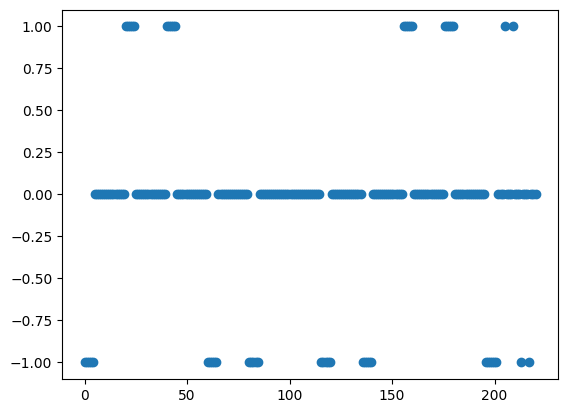

In [26]:
plt.scatter(y, p)

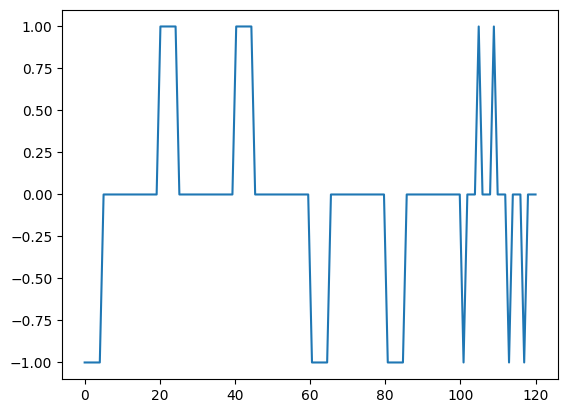

In [21]:
plt.plot(y,p)